In [1]:
from proveit.expression import Operation
from proveit.basiclogic import Implies, In, Equals, autoSubstitute, deriveStmtEqTrue, compose
from proveit.physics.quantum.QPE.axioms import tInNaturalsPos, nInNatPos, unitaryU, \
    uKetRegister, psiKetsInQRegSpace, firstQPE, midQPE, finalQPE, PsiKetInQRegSpace, alphaDef, modAddDef
from proveit.physics.quantum.QPE.theorems import alpha_l_eval, phaseInReals, intermediateQPE, bestInInts
from proveit.physics.quantum.QPE.common import n_, u_, U_, psi_1, psi_k, psi_next, psi_t, phase_, U_pow_two_pow_k,\
    Psi_, t_, b_
from proveit.physics.quantum.QPE.phaseEstOps import ModAdd
from proveit.physics.quantum.QFT.theorems import invFTinSU, invFTonMatrixElem
from proveit.physics.quantum.QFT import InverseFourierTransform
from proveit.number.common import zero, one, two, e, pi, i
from proveit.common import a, b, c, d, f, j, k, l, n, u, x, y, z, U, P, X, alpha, xEtc
from proveit.number import Exponentiate, Summation, Fraction, Multiply, Sqrt, Add, Subtract, DiscreteContiguousSet, \
    Neg
from proveit.number.numberSets import Naturals, NaturalsPos, deduceInNaturals, deduceInNaturalsPos, \
    Integers, deduceInIntegers, deduceInComplexes, deduceInReals, deducePositive
from proveit.physics.quantum import Ket, RegisterKet
from proveit.physics.quantum.axioms import ketZeroInQubitSpace, ketOneInQubitSpace, singleQubitRegisterZero, \
    singleQubitRegisterOne, expandRegisterWithZeroKet, expandRegisterWithOneKet, circuitMultiGateApplication
from proveit.physics.quantum.theorems import pregatedControlledNgateEquiv, controlledNgateEquiv, unitaryHadamard, \
    scaledQubitStateInQubitSpace, summedQubitStateInQubitSpace, transformedQubitStateInQubitSpace, \
    pregatedControlledNgateMerger, unitaryHadamard, registerBraOverSummedKet
from proveit.physics.quantum.common import QubitSpace, H, ket0, ket1, ketPlus, invRoot2
from proveit.linalg import ScalarProd, MatrixProd, TensorProd
from proveit.linalg.theorems import intPowSUclosure
from proveit.number.natural.axioms import zeroAddOne, oneAddOne
from proveit.number.natural.theorems import sumZeroAndOne, naturalsPosInduction, twoSubOne
from proveit.number.integer.theorems import shiftLessThanToLessThanEquals
from proveit.number.real.theorems import sqrtTimesItself
from proveit.number.complex.theorems import cancelSubThenAdd, addTwice
from IPython.display import display

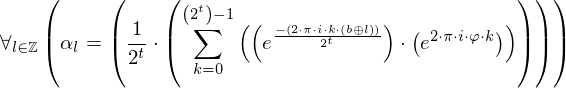

In [2]:
alpha_l_eval.beginProof()

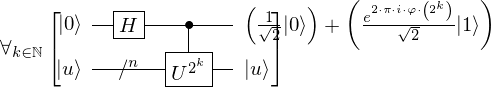

In [3]:
intermediateQPE

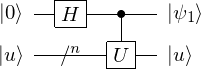

In [4]:
firstQPE

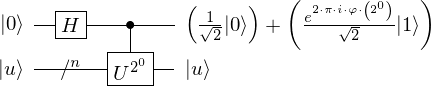

In [5]:
deduceInNaturals(zero)
intermediateQPE0_1 = intermediateQPE.specialize({k:zero})
intermediateQPE0_1.proven()

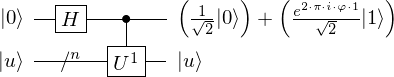

In [6]:
intermediateQPE0_2 = Exponentiate(two, zero).simplification().subRightSideInto(intermediateQPE0_1)
intermediateQPE0_2.proven()

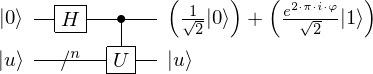

In [7]:
intermediateQPE0_3 = autoSubstitute(intermediateQPE0_2, 'simplification', [], suppressWarnings=True)
intermediateQPE0_4 = autoSubstitute(intermediateQPE0_3, 'simplification', [], suppressWarnings=True)
intermediateQPE0_4.proven()

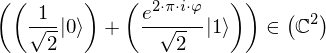

In [8]:
psi1_val = intermediateQPE0_4.operands[0][(0, 3)].operands[0]
deduceInComplexes(psi1_val.terms[0].scalar)
deduceInComplexes(psi1_val.terms[1].scalar)
scaledQubitStateInQubitSpace.specialize({x:psi1_val.terms[0].scaled}).specialize({alpha:psi1_val.terms[0].scalar}).proven()
scaledQubitStateInQubitSpace.specialize({x:psi1_val.terms[1].scaled}).specialize({alpha:psi1_val.terms[1].scalar}).proven()
summedQubitStateInQubitSpace.specialize({xEtc:psi1_val.terms}).proven()

In [9]:
psi1InQRegSpace = psiKetsInQRegSpace.specialize({k:one}).proven()
psi1InQRegSpace.domain.simplification().subRightSideInto(psi1InQRegSpace).proven()

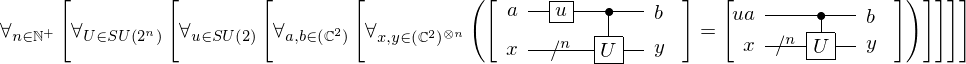

In [10]:
pregatedControlledNgateEquiv

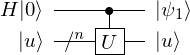

In [11]:
pregatedUgateEquivPsi1 = pregatedControlledNgateEquiv.specialize({n:n_}).specialize({U:U_}).specialize({u:H}).specialize({a:ket0, b:Ket(psi_1)}).specialize({x:Ket(u_), y:Ket(u_)})
firstQPE_appliedPreGate = pregatedUgateEquivPsi1.deriveRightViaEquivalence()
firstQPE_appliedPreGate.proven()

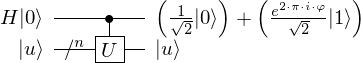

In [12]:
pregatedUgateEquivPsi1Eval = pregatedControlledNgateEquiv.specialize({n:n_}).specialize({U:U_}).specialize({u:H}).specialize({a:ket0, b:psi1_val}).specialize({x:Ket(u_), y:Ket(u_)})
psi1EvalCircuit_appliedPreGate = pregatedUgateEquivPsi1Eval.deriveRightViaEquivalence()
psi1EvalCircuit_appliedPreGate.proven()

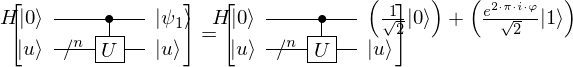

In [13]:
psi1_CircuitEquiv = deriveStmtEqTrue(psi1EvalCircuit_appliedPreGate).subLeftSideInto(deriveStmtEqTrue(firstQPE_appliedPreGate))
psi1_CircuitEquiv.proven()

In [14]:
transformedQubitStateInQubitSpace.specialize({x:ket0}).specialize({U:H}).proven()

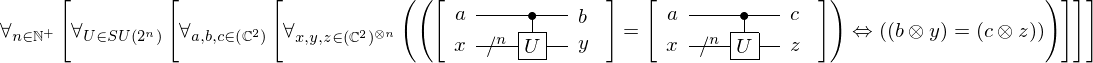

In [15]:
controlledNgateEquiv

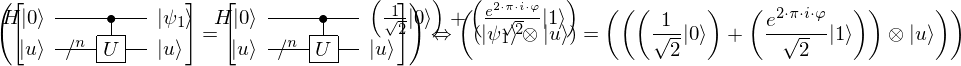

In [16]:
controlledNgateEquivPsi1 = controlledNgateEquiv.specialize({n:n_}).specialize({U:U_}).specialize({a:MatrixProd(H, ket0), b:Ket(psi_1), c:psi1_val}).specialize({x:Ket(u_), y:Ket(u_), z:Ket(u_)})
controlledNgateEquivPsi1.proven()

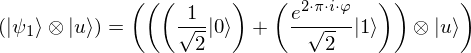

In [17]:
psi1TensorProdEquality = controlledNgateEquivPsi1.deriveRight()
psi1TensorProdEquality.proven()

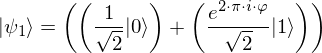

In [18]:
psi1Eq1 = psi1TensorProdEquality.lhs.equateFactors(psi1TensorProdEquality).deriveRight()
psi1Eq1.proven()

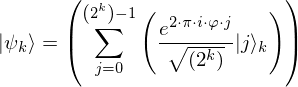

In [19]:
# to be proven inductively
psi_k_eq = Equals(Ket(psi_k),
                  Summation(j, ScalarProd(Fraction(Exponentiate(e, Multiply(two, pi, i, phase_, j)), 
                                                   Sqrt(Exponentiate(two, k))), RegisterKet(j, k)),
                            domain = DiscreteContiguousSet(zero, Subtract(Exponentiate(two, k), one))))
psi_k_eq

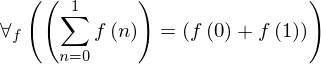

In [20]:
sumZeroAndOne

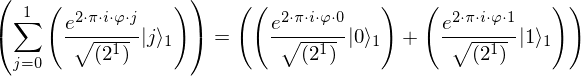

In [21]:
psi_1_sum_eq1 = sumZeroAndOne.specialize({Operation(f, j):psi_k_eq.rhs.summand.substituted({k:one}), n:j}).proven()
psi_1_sum_eq1.proven()

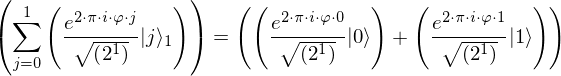

In [22]:
psi_1_sum_eq2 = singleQubitRegisterZero.subRightSideInto(psi_1_sum_eq1)
psi_1_sum_eq3 = singleQubitRegisterOne.subRightSideInto(psi_1_sum_eq2)
psi_1_sum_eq3.proven()

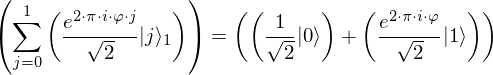

In [23]:
psi_1_sum_eq4 = autoSubstitute(psi_1_sum_eq3, 'simplification', [], suppressWarnings=True)
psi_1_sum_eq5 = autoSubstitute(psi_1_sum_eq4, 'simplification', [], suppressWarnings=True)
psi_1_sum_eq6 = autoSubstitute(psi_1_sum_eq5, 'simplification', [], suppressWarnings=True)
psi_1_sum_eq7 = autoSubstitute(psi_1_sum_eq6, 'simplification', [], suppressWarnings=True)
psi_1_sum_eq7.proven()

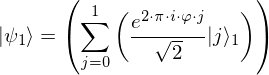

In [24]:
# proves the base case for psi_k_eq
psi1Eq2 = psi_1_sum_eq7.subLeftSideInto(psi1Eq1)
psi1Eq2.proven()

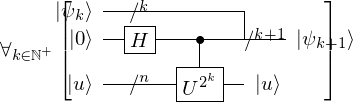

In [25]:
midQPE

In [26]:
intPowSUclosure

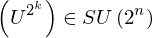

In [27]:
deduceInNaturalsPos(U_pow_two_pow_k.exponent, {In(k, NaturalsPos)})
deduceInNaturalsPos(Exponentiate(two, n_))
intPowSUclosure.specialize({n:Exponentiate(two, n_), k:U_pow_two_pow_k.exponent}).specialize({U:U_}).proven({In(k, NaturalsPos)})

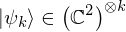

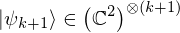

In [28]:
kInNatsPos = In(k, NaturalsPos)
display(kInNatsPos)
psi_k_inQRegSpace = psiKetsInQRegSpace.specialize()
display(psi_k_inQRegSpace.proven({kInNatsPos}))
deduceInNaturalsPos(Add(k, one), {kInNatsPos})
psi_next_inQRegSpace = psiKetsInQRegSpace.specialize({k:Add(k, one)})
psi_next_inQRegSpace.proven({kInNatsPos})

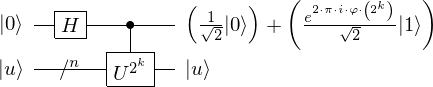

In [29]:
intermediateQPE_spec = intermediateQPE.specialize()
intermediateQPE_spec.proven({kInNatsPos})

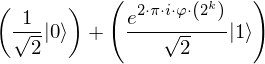

In [30]:
intermediateOutputKet = intermediateQPE_spec.operands[0][(0, 3)].operands[0]
intermediateOutputKet

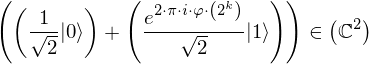

In [31]:
deduceInComplexes(intermediateOutputKet.terms[0].scalar)
deduceInComplexes(intermediateOutputKet.terms[1].scalar, {kInNatsPos})
scaledQubitStateInQubitSpace.specialize({x:ket1}).specialize({alpha:intermediateOutputKet.terms[1].scalar})
summedQubitStateInQubitSpace.specialize({xEtc:intermediateOutputKet.terms}).proven({kInNatsPos})

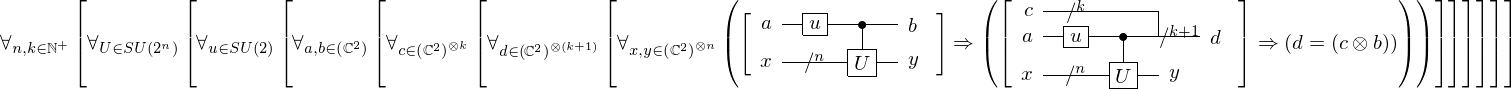

In [32]:
pregatedControlledNgateMerger

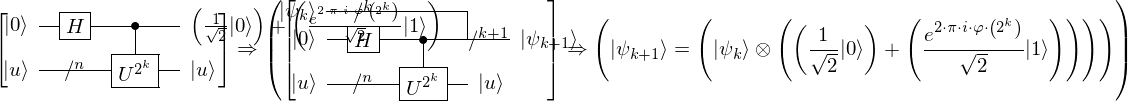

In [33]:
merger1 = pregatedControlledNgateMerger.specialize({n:n_}).specialize({U:U_pow_two_pow_k}).specialize({u:H}).specialize({a:ket0, b:intermediateOutputKet}).specialize({c:Ket(psi_k)}).specialize({d:Ket(psi_next)}).specialize({x:Ket(u_), y:Ket(u_)})
merger1.proven({kInNatsPos})

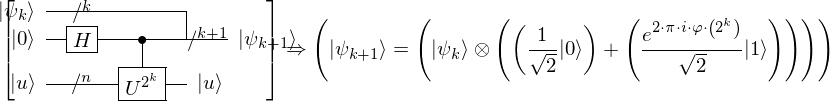

In [34]:
merger2 = merger1.deriveConclusion()
merger2.proven({kInNatsPos})

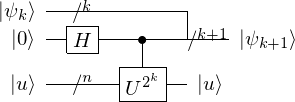

In [35]:
midQPE.specialize().proven({kInNatsPos})

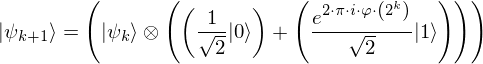

In [36]:
merger3 = merger2.deriveConclusion()
merger3.proven({kInNatsPos})

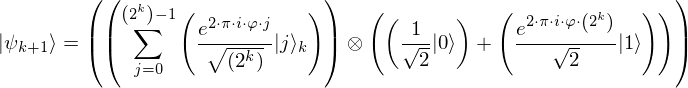

In [37]:
merger4 = psi_k_eq.subRightSideInto(merger3)
merger4.proven({kInNatsPos, psi_k_eq})

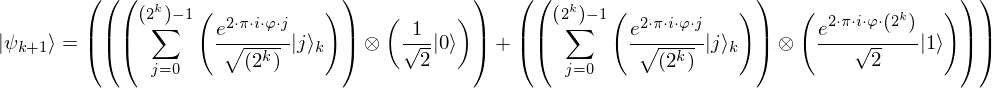

In [38]:
merger5 = merger4.rhs.distribute(1).subRightSideInto(merger4)
merger5.proven({kInNatsPos, psi_k_eq})

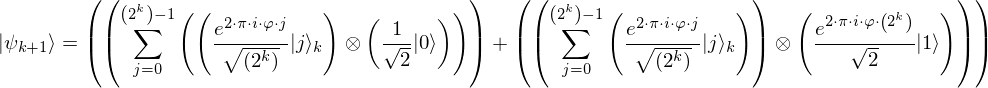

In [39]:
merger6 = merger5.rhs.terms[0].distribute(0).subRightSideInto(merger5)
merger6.proven({kInNatsPos, psi_k_eq})

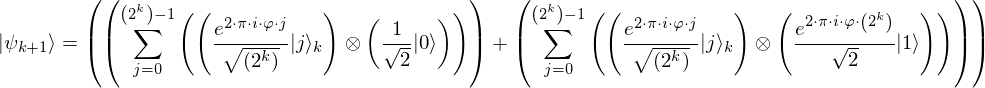

In [40]:
merger7 = merger6.rhs.terms[1].distribute(0).subRightSideInto(merger6)
merger7.proven({kInNatsPos, psi_k_eq})

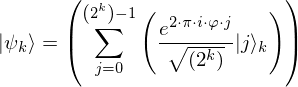

In [41]:
psi_k_eq

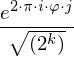

In [42]:
psi_k_eq.rhs.summand.scalar

In [43]:
jInDomain = In(j, merger7.rhs.terms[0].domain)

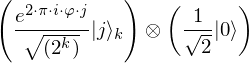

In [44]:
firstSummand = merger7.rhs.terms[0].summand
firstSummand

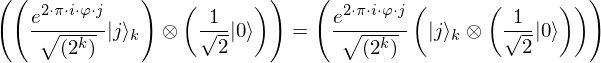

In [45]:
firstSummandEq1 = firstSummand.factor(psi_k_eq.rhs.summand.scalar)
firstSummandEq1.proven({jInDomain})

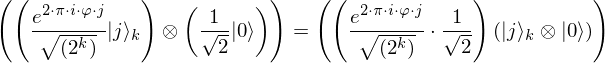

In [46]:
firstSummandEq2 = firstSummandEq1.rhs.factor(invRoot2).subRightSideInto(firstSummandEq1)
firstSummandEq2.proven({jInDomain})

In [47]:
expandRegisterWithZeroKet

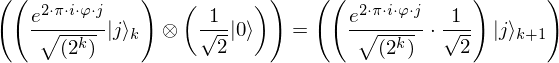

In [48]:
firstSummandEq3 = expandRegisterWithZeroKet.specialize({n:k, k:j}).specialize().subLeftSideInto(firstSummandEq2)
firstSummandEq3.proven({kInNatsPos, jInDomain})

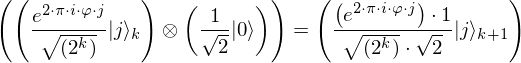

In [49]:
jInDomain.domain.deduceMemberInIntegers(j, {kInNatsPos}).proven({kInNatsPos, jInDomain})
firstSummandEq4 = autoSubstitute(firstSummandEq3, 'distribute', [], {'assumptions':{kInNatsPos, jInDomain}}, superExpr=firstSummandEq3.rhs.scalar, suppressWarnings=True)
firstSummandEq4.proven({kInNatsPos, jInDomain})

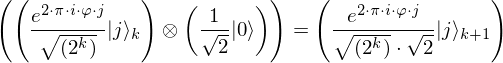

In [50]:
firstSummandEq5 = autoSubstitute(firstSummandEq4, 'simplification', [], {'assumptions':{kInNatsPos, jInDomain}}, superExpr=firstSummandEq4.rhs.scalar, suppressWarnings=True)
firstSummandEq5.proven({kInNatsPos, jInDomain})

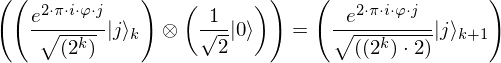

In [51]:
firstSummandEq6 = autoSubstitute(firstSummandEq5, 'combineExponents', [], {'assumptions':{kInNatsPos, jInDomain}}, superExpr=firstSummandEq5.rhs.scalar, suppressWarnings=True)
firstSummandEq6.proven({kInNatsPos, jInDomain})

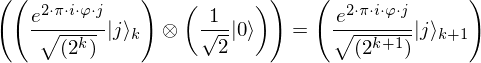

In [52]:
firstSummandEq7 = autoSubstitute(firstSummandEq6, 'combineExponents', [], {'assumptions':{kInNatsPos, jInDomain}}, superExpr=firstSummandEq6.rhs.scalar, suppressWarnings=True)
firstSummandEq7.proven({kInNatsPos, jInDomain})

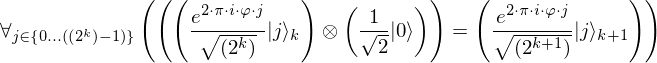

In [53]:
generalizedFirstSummandEq = firstSummandEq7.generalize(j, domain=jInDomain.domain)
generalizedFirstSummandEq.proven({kInNatsPos})

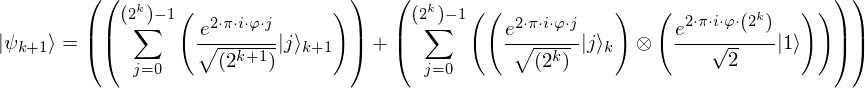

In [54]:
merger8 = merger7.rhs.terms[0].instanceSubstitution(generalizedFirstSummandEq).subRightSideInto(merger7)
merger8.proven({kInNatsPos, psi_k_eq})

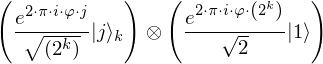

In [55]:
secondSummand = merger7.rhs.terms[1].summand
secondSummand

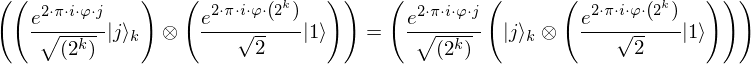

In [56]:
secondSummandEq1 = secondSummand.factor(psi_k_eq.rhs.summand.scalar)
secondSummandEq1.proven({jInDomain})

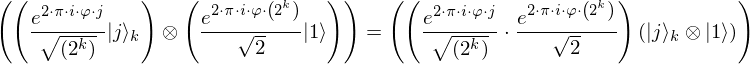

In [57]:
secondSummandEq2 = secondSummandEq1.rhs.factor(secondSummand.factors[1].scalar).subRightSideInto(secondSummandEq1)
secondSummandEq2.proven({jInDomain})

In [58]:
expandRegisterWithOneKet

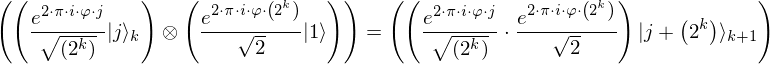

In [59]:
secondSummandEq3 = expandRegisterWithOneKet.specialize({n:k, k:j}).specialize().subLeftSideInto(secondSummandEq2)
secondSummandEq3.proven({kInNatsPos, jInDomain})

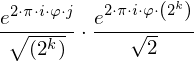

In [60]:
secondSumFactor = secondSummandEq3.rhs.scalar
secondSumFactor

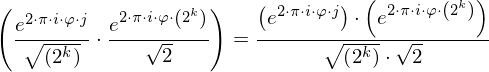

In [61]:
secondSumFactor_eq1 = secondSumFactor.distribute(assumptions={kInNatsPos, jInDomain})
secondSumFactor_eq1.proven({kInNatsPos, jInDomain})

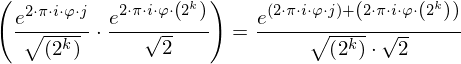

In [62]:
secondSumFactor_eq2 = secondSumFactor_eq1.rhs.numerator.combineExponents(assumptions={kInNatsPos, jInDomain}).subRightSideInto(secondSumFactor_eq1)
secondSumFactor_eq2.proven({kInNatsPos, jInDomain})

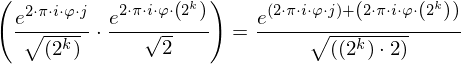

In [63]:
secondSumFactor_eq3 = secondSumFactor_eq2.rhs.denominator.combineExponents(assumptions={kInNatsPos, jInDomain}).subRightSideInto(secondSumFactor_eq2)
secondSumFactor_eq3.proven({kInNatsPos, jInDomain})

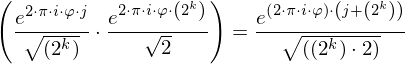

In [64]:
secondSumFactor_eq4 = autoSubstitute(secondSumFactor_eq3, 'factor', [Multiply(two, pi, i, phase_)], {'assumptions':{kInNatsPos, jInDomain}}, superExpr=secondSumFactor_eq3.rhs, suppressWarnings=True)
secondSumFactor_eq4.proven({kInNatsPos, jInDomain})

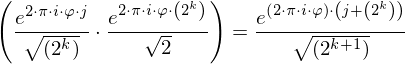

In [65]:
secondSumFactor_eq5 = autoSubstitute(secondSumFactor_eq4, 'combineExponents', [], {'assumptions':{kInNatsPos, jInDomain}}, superExpr=secondSumFactor_eq4.rhs.denominator, suppressWarnings=True)
secondSumFactor_eq5.proven({kInNatsPos, jInDomain})

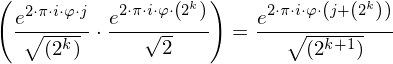

In [66]:
secondSumFactor_eq6 = autoSubstitute(secondSumFactor_eq5, 'ungroup', [0], {'assumptions':{kInNatsPos, jInDomain}}, superExpr=secondSumFactor_eq5.rhs.numerator, suppressWarnings=True)
secondSumFactor_eq6.proven({kInNatsPos, jInDomain})

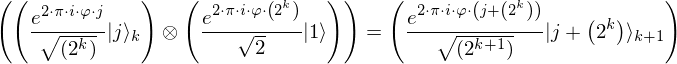

In [67]:
secondSummandEq4 = secondSumFactor_eq6.subRightSideInto(secondSummandEq3)
secondSummandEq4.proven({kInNatsPos, jInDomain})

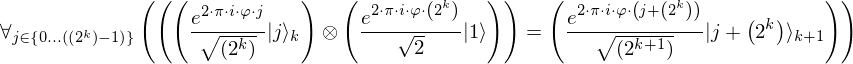

In [68]:
generalizedSecondSummandEq = secondSummandEq4.generalize(j, domain=jInDomain.domain)
generalizedSecondSummandEq.proven({kInNatsPos})

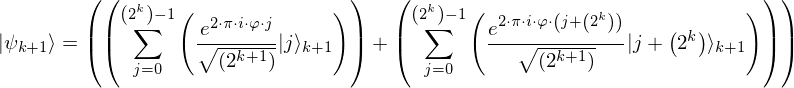

In [69]:
merger9 = merger8.rhs.terms[1].instanceSubstitution(generalizedSecondSummandEq).subRightSideInto(merger8)
merger9.proven({kInNatsPos, psi_k_eq})

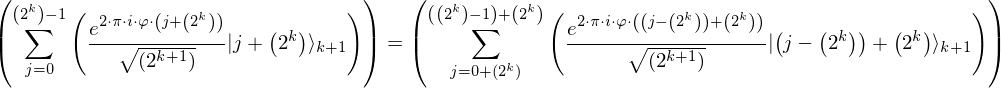

In [70]:
secondTermEq1 = merger9.rhs.terms[1].shift(Exponentiate(two, k), {kInNatsPos})
secondTermEq1.proven({kInNatsPos})

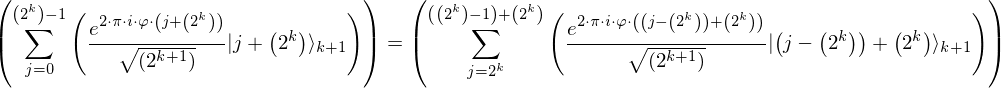

In [71]:
secondTermEq2 = autoSubstitute(secondTermEq1, 'simplification', [], {'assumptions':{kInNatsPos}}, superExpr=secondTermEq1.rhs.domain.lowerBound, suppressWarnings=True)
secondTermEq2.proven({kInNatsPos})

In [72]:
cancelSubThenAdd

In [73]:
secondTermEq2.rhs.domain.deduceMemberInIntegers(j, {kInNatsPos})
deduceInComplexes(j, {kInNatsPos, In(j, secondTermEq2.rhs.domain)})
deduceInComplexes(Exponentiate(two, k), {kInNatsPos})
jCancellation = cancelSubThenAdd.specialize({a:j, b:Exponentiate(two, k)})
jCancellation.proven({kInNatsPos, In(j, secondTermEq2.rhs.domain)})

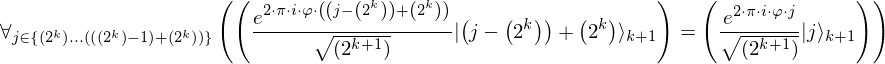

In [74]:
summandCancellation = jCancellation.substitution(secondTermEq2.rhs.summand).generalize(j, domain=secondTermEq2.rhs.domain)
summandCancellation.proven({kInNatsPos, In(j, secondTermEq2.rhs.domain)})

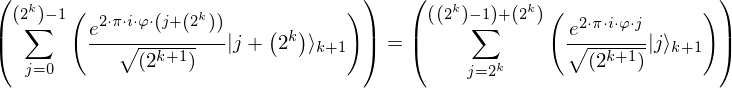

In [75]:
secondTermEq3 = secondTermEq2.rhs.instanceSubstitution(summandCancellation).subRightSideInto(secondTermEq2)
secondTermEq3.proven({kInNatsPos})

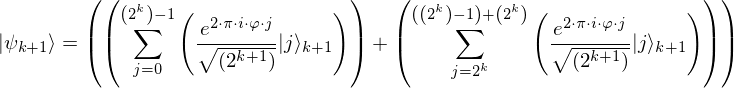

In [76]:
merger10 = secondTermEq3.subRightSideInto(merger9)
merger10.proven({kInNatsPos, psi_k_eq})

In [77]:
two_pow_k = Exponentiate(two, k)
deduceInNaturalsPos(two_pow_k, {kInNatsPos})
two_pow_k__geq__one = NaturalsPos.deduceMemberLowerBound(merger10.rhs.terms[1].domain.lowerBound).proven({kInNatsPos})
display(zeroAddOne.subRightSideInto(zeroAddOne.lhs.deduceStrictIncrease(0)).applyTransitivity(two_pow_k__geq__one).deriveReversed().proven({kInNatsPos}))

In [78]:
merger10.rhs.terms[1].domain.upperBound.deduceStrictIncrease(0, {kInNatsPos}).deriveReversed().proven({kInNatsPos})
deduceInIntegers([merger10.rhs.terms[1].domain.lowerBound, merger10.rhs.terms[1].domain.upperBound], {kInNatsPos})
shiftLessThanToLessThanEquals.specialize({a:two_pow_k, b:merger10.rhs.terms[1].domain.upperBound}).proven({kInNatsPos})

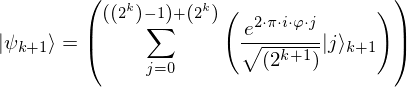

In [79]:
merger11 = merger10.rhs.join(assumptions={kInNatsPos}).subRightSideInto(merger10)
merger11.proven({kInNatsPos, psi_k_eq})

In [80]:
addTwice

In [81]:
newUpperBound_eq1 = addTwice.specialize({a:Exponentiate(two, k)})
newUpperBound_eq1.proven({kInNatsPos})

In [82]:
newUpperBound_eq2 = newUpperBound_eq1.rhs.combineExponents(assumptions={kInNatsPos}).subRightSideInto(newUpperBound_eq1)
newUpperBound_eq2.proven({kInNatsPos})

In [83]:
newUpperBound_eq3 = newUpperBound_eq2.rhs.exponent.commute(assumptions={kInNatsPos}).subRightSideInto(newUpperBound_eq2)
newUpperBound_eq3.proven({kInNatsPos})

In [84]:
newUpperBound_eq4 = newUpperBound_eq3.substitution(Subtract(X, one), X)
newUpperBound_eq4.proven({kInNatsPos})

In [85]:
newUpperBound_eq5 = newUpperBound_eq4.lhs.convertToAdd({kInNatsPos}).subRightSideInto(newUpperBound_eq4)
newUpperBound_eq5.proven({kInNatsPos})

In [86]:
newUpperBound_eq6 = newUpperBound_eq5.lhs.ungroup(0, {kInNatsPos}).subRightSideInto(newUpperBound_eq5)
newUpperBound_eq6.proven({kInNatsPos})

In [87]:
newUpperBound_eq7 = newUpperBound_eq6.lhs.commute(1, 2, 2, assumptions={kInNatsPos}).subRightSideInto(newUpperBound_eq6)
newUpperBound_eq7.proven({kInNatsPos})

In [88]:
newUpperBound_eq8 = newUpperBound_eq7.lhs.group(0, 2, assumptions={kInNatsPos}).subRightSideInto(newUpperBound_eq7)
newUpperBound_eq8.proven({kInNatsPos})

In [89]:
newUpperBound_eq9 = newUpperBound_eq8.lhs.terms[0].subtractionFolding(assumptions={kInNatsPos}).subRightSideInto(newUpperBound_eq8)
newUpperBound_eq9.proven({kInNatsPos})

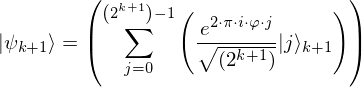

In [90]:
merger12 = newUpperBound_eq9.subRightSideInto(merger11)
merger12.proven({kInNatsPos, psi_k_eq})

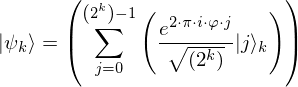

In [91]:
psi_k_eq

In [92]:
naturalsPosInduction

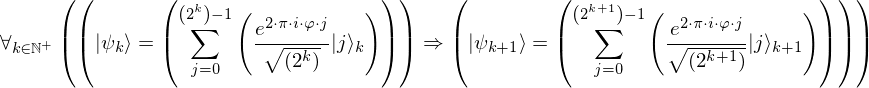

In [93]:
psi_k_induction = Implies(psi_k_eq, merger12).generalize(k, domain=NaturalsPos)
psi_k_induction.proven()

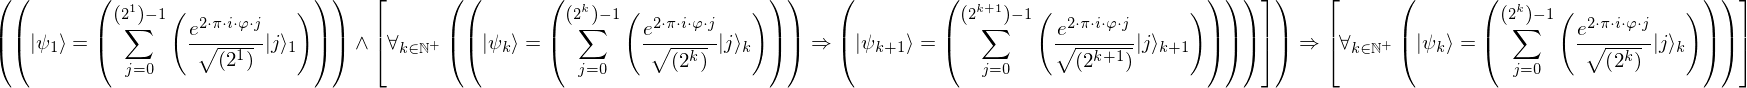

In [94]:
inductionSpec = naturalsPosInduction.specialize({Operation(P, k):psi_k_eq, n:k})
inductionSpec.proven()

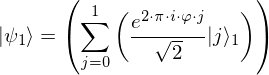

In [95]:
psi1Eq2.proven()

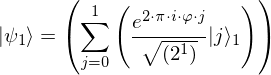

In [96]:
psi1Eq3 = Exponentiate(two, one).simplification().substitution(Sqrt(X), X).subLeftSideInto(psi1Eq2)
psi1Eq3.proven()

In [97]:
baseCaseUpperBound = Subtract(Exponentiate(two, one), one)
baseCaseUpperBound

In [98]:
baseCaseUpperBoundEq1 = baseCaseUpperBound.operands[0].simplification().substitution(baseCaseUpperBound)
baseCaseUpperBoundEq1.proven()

In [99]:
baseCaseUpperBoundEq2 = twoSubOne.subRightSideInto(baseCaseUpperBoundEq1)
baseCaseUpperBoundEq2

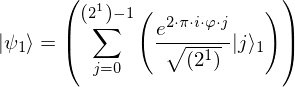

In [100]:
psi_k_baseCase = baseCaseUpperBoundEq2.deriveReversed().substitution(DiscreteContiguousSet(zero, one)).subRightSideInto(psi1Eq3)
psi_k_baseCase.proven()

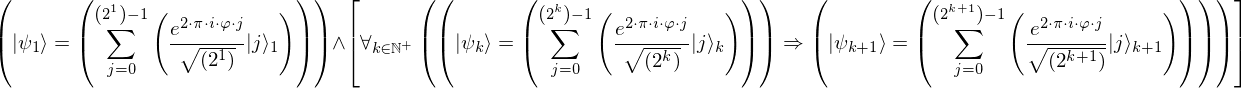

In [101]:
compose(psi_k_baseCase, psi_k_induction).proven()

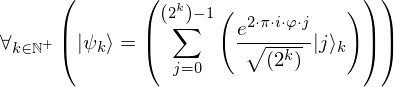

In [102]:
induced_psi_k = inductionSpec.deriveConclusion()
induced_psi_k.proven()

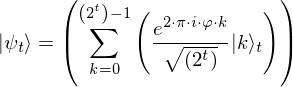

In [103]:
display(psiKetsInQRegSpace.specialize({k:t_}).proven())
psi_t_eq = induced_psi_k.specialize({k:t_, j:k})
display(psi_t_eq.proven())

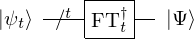

In [104]:
finalQPE

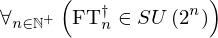

In [105]:
invFTinSU

In [106]:
invFTinSU.specialize({n:t_})

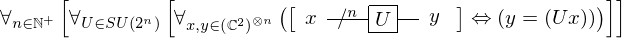

In [107]:
circuitMultiGateApplication

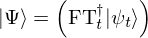

In [108]:
Psi_eq1 = circuitMultiGateApplication.specialize({n:t_}).specialize({U:InverseFourierTransform(t_)}).specialize({x:Ket(psi_t), y:Ket(Psi_)}).deriveRight()
Psi_eq1.proven()

In [109]:
alphaDef

In [110]:
lInInts = In(l, Integers)
lInInts

In [111]:
modAddDef

In [112]:
b_modadd_l_unfolded = modAddDef.specialize({a:b_, b:l})
b_modadd_l_unfolded.proven({lInInts})

In [113]:
b_modadd_l_unfolded.subLeftSideInto(b_modadd_l_unfolded.rhs.deduceInInterval({lInInts})).proven({lInInts})

In [114]:
alpha_eq1 = alphaDef.specialize()
alpha_eq1.proven({lInInts})

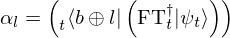

In [115]:
alpha_eq2 = Psi_eq1.subRightSideInto(alpha_eq1)
alpha_eq2.proven({lInInts})

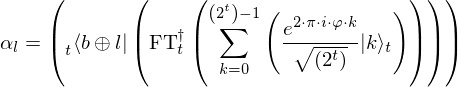

In [116]:
alpha_eq3 = psi_t_eq.subRightSideInto(alpha_eq2)
alpha_eq3.proven({lInInts})

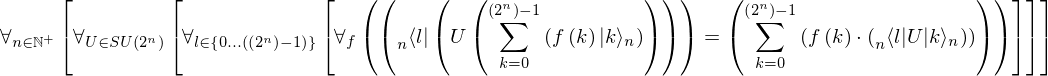

In [117]:
registerBraOverSummedKet

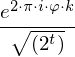

In [118]:
psi_t_summand_scalar = psi_t_eq.rhs.summand.scalar
psi_t_summand_scalar

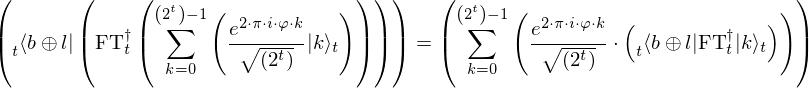

In [119]:
alpha_eq3_rhs_eq = registerBraOverSummedKet.specialize({n:t_}).specialize({U:InverseFourierTransform(t_)}).specialize({l:ModAdd(b_, l)}).specialize({Operation(f, k):psi_t_summand_scalar})
alpha_eq3_rhs_eq.proven({lInInts})

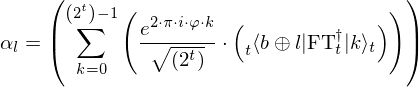

In [120]:
alpha_eq4 = alpha_eq3.applyTransitivity(alpha_eq3_rhs_eq)
alpha_eq4.proven({lInInts})

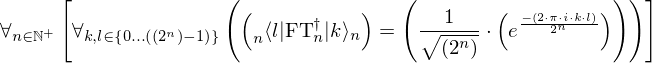

In [121]:
invFTonMatrixElem

In [122]:
kInDomain = In(k, alpha_eq4.rhs.domain)
kInDomain

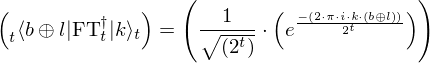

In [123]:
invFTonMatrixElemSpec = invFTonMatrixElem.specialize({n:t_}).specialize({l:ModAdd(b_, l)})
invFTonMatrixElemSpec.proven({lInInts, kInDomain})

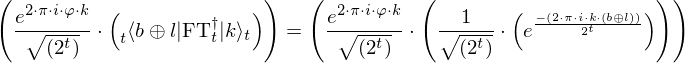

In [124]:
summandSub1 = invFTonMatrixElemSpec.substitution(alpha_eq4.rhs.summand)
summandSub1.proven({lInInts, kInDomain})

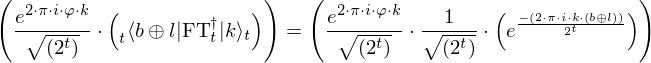

In [125]:
kInDomain.domain.deduceMemberInIntegers(k)
summandSub2 = summandSub1.rhs.ungroup(1, {lInInts, kInDomain}).subRightSideInto(summandSub1)
summandSub2.proven({lInInts, kInDomain})

In [126]:
kPhaseFactor = summandSub2.rhs.operands[0].numerator
kPhaseFactor

In [127]:
root_two_pow_t = Sqrt(Exponentiate(two, t_))
root_two_pow_t

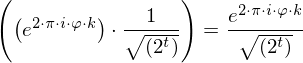

In [128]:
kPhaseFactorDist = Multiply(kPhaseFactor, Fraction(one, root_two_pow_t)).distribute(1, assumptions={kInDomain})
kPhaseFactorDist.proven({kInDomain})

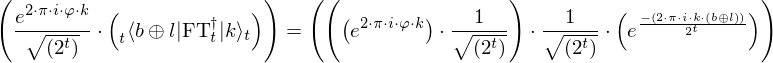

In [129]:
summandSub3 = kPhaseFactorDist.deriveReversed().substitution(summandSub2.rhs).subRightSideInto(summandSub2)
summandSub3.proven({lInInts, kInDomain})

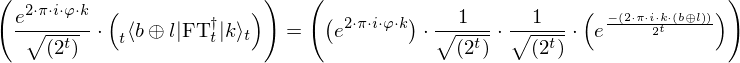

In [130]:
summandSub4 = summandSub3.rhs.ungroup(0, assumptions={lInInts, kInDomain}).subRightSideInto(summandSub3)
summandSub4.proven({lInInts, kInDomain})

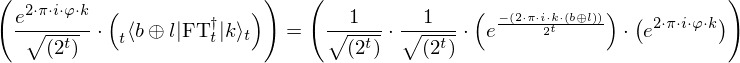

In [131]:
summandSub5 = summandSub4.rhs.commute(0, 1, 4, None, assumptions={lInInts, kInDomain}).subRightSideInto(summandSub4)
summandSub5.proven({lInInts, kInDomain})

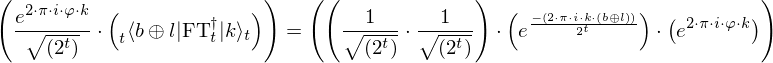

In [132]:
summandSub6 = summandSub5.rhs.group(0, 2, assumptions={lInInts, kInDomain}).subRightSideInto(summandSub5)
summandSub6.proven({lInInts, kInDomain})

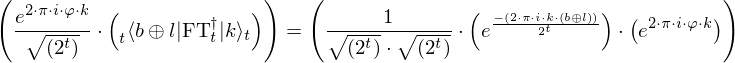

In [133]:
summandSub7 = Fraction(one, Multiply(root_two_pow_t, root_two_pow_t)).factor(Fraction(one, root_two_pow_t)).subLeftSideInto(summandSub6)
summandSub7.proven({lInInts, kInDomain})

In [134]:
sqrtTimesItself

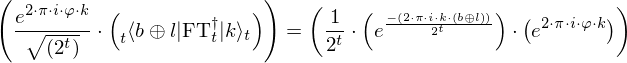

In [135]:
deduceInReals(Exponentiate(two, t_))
deducePositive(Exponentiate(two, t_)).deriveRelaxed()
summandSub8 = sqrtTimesItself.specialize({x:Exponentiate(two, t_)}).subRightSideInto(summandSub7)
summandSub8.proven({lInInts, kInDomain})

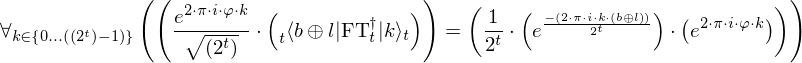

In [136]:
generalizedSummandSub = summandSub8.generalize(k, domain=kInDomain.domain)
generalizedSummandSub.proven({lInInts})

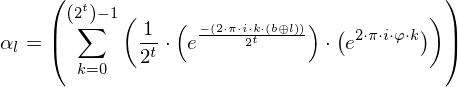

In [137]:
alpha_eq5 = alpha_eq4.applyTransitivity(alpha_eq4.rhs.instanceSubstitution(generalizedSummandSub))
alpha_eq5.proven({lInInts})

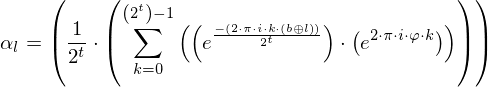

In [138]:
alpha_eq6 = alpha_eq5.applyTransitivity(alpha_eq5.rhs.factor(Fraction(one, Exponentiate(two, t_)), assumptions={lInInts}))
alpha_eq6.proven({lInInts})

root $\forall_{ l  \in \mathbb{Z}} \left(\alpha_{l} = \left( \frac{1}{2^{t}} \cdot \left(\sum_{k=0}^{\left(2^{t}\right) - 1} \left( \left(e^{\frac{-\left( 2 \cdot \pi \cdot i \cdot k \cdot \left(b \oplus l\right) \right)}{2^{t}}}\right) \cdot \left(e^{ 2 \cdot \pi \cdot i \cdot \varphi \cdot k }\right) \right)\right) \right)\right)$ 
  generalizing $\alpha_{l} = \left( \frac{1}{2^{t}} \cdot \left(\sum_{k=0}^{\left(2^{t}\right) - 1} \left( \left(e^{\frac{-\left( 2 \cdot \pi \cdot i \cdot k \cdot \left(b \oplus l\right) \right)}{2^{t}}}\right) \cdot \left(e^{ 2 \cdot \pi \cdot i \cdot \varphi \cdot k }\right) \right)\right) \right)$  assuming $l \in \mathbb{Z}$ 
    implication $\left(\left(\sum_{k=0}^{\left(2^{t}\right) - 1} \left( \frac{1}{2^{t}} \cdot \left(e^{\frac{-\left( 2 \cdot \pi \cdot i \cdot k \cdot \left(b \oplus l\right) \right)}{2^{t}}}\right) \cdot \left(e^{ 2 \cdot \pi \cdot i \cdot \varphi \cdot k }\right) \right)\right) = \left( \frac{1}{2^{t}} \cdot \left(\sum_{k=0}^{\

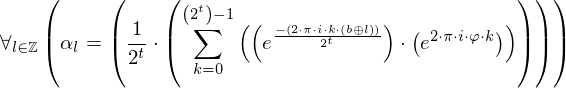

In [139]:
alpha_eq6.generalize(l, domain=Integers).qed()